In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
HP_loss_A1 = np.arange(3, 12)                           # ith entry is the HP cost on the ith step, on ascensions < 15
HP_loss_A20 = np.arange(5, 14)                          # ith entry is the HP cost on the ith step, on ascensions >= 15
p_success = np.append(np.arange(0.25, 1, 0.10), [1])    # ith entry is the probability of success on the ith step
n = 9                                                   # total number of steps
print("HP loss before A15:\t", HP_loss_A1)
print("HP loss after A15:\t", HP_loss_A20)
print("Probability of success:\t", p_success)

HP loss before A15:	 [ 3  4  5  6  7  8  9 10 11]
HP loss after A15:	 [ 5  6  7  8  9 10 11 12 13]
Probability of success:	 [0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.  ]


In [141]:
subseq_p_win = np.zeros((n,n)) # Probability of failing steps i..j-1 and succeding on step j
# Formula: p_geometric subsequence[i][j] = (1 - p_success[i]) * (1 - p_success[i+1]) * ... * (1 - p_success[j-1]) * p_success[j]
for i in range(n):
    for j in range(i,n):
        subseq_p_win[i][j] = p_success[j]
        for k in range(i, j):
            subseq_p_win[i][j] *= (1-p_success[k])

subseq_cum_p_win = np.zeros((n,n)) # Cumulative HP loss of steps i..j
for i in range(n):
    for j in range(n):
        subseq_cum_p_win[i][j] = sum(subseq_p_win[i, 0:j+1])

subseq_cum_HP_loss = np.zeros((n,n), dtype=np.int64) # HP loss of steps i..j
for i in range(n):
    for j in range(i,n):
        subseq_cum_HP_loss[i][j] = sum(HP_loss_A1[i:j+1])



print("Probability of failing steps i..j-1 and succeding on step j:")
print("   | 1         2         3         4         5         6         7         8         9")
print("---+-------------------------------------------------------------------------------------------")
for i in range(n):
    line = f" {i+1} | " 
    for j in range(n):
        temp = f"{subseq_p_win[i][j]:.7f}".rstrip('0').rstrip('.')
        line += f"{temp:10}"
    print(line)

print("Cumulative probability of winning on step <= j when starting from step i:")
print("   | 1         2         3         4         5         6         7         8         9")
print("---+-------------------------------------------------------------------------------------------")
for i in range(n):
    line = f" {i+1} | " 
    for j in range(n):
        temp = f"{subseq_cum_p_win[i][j]:.7f}".rstrip('0').rstrip('.')
        line += f"{temp:10}"
    print(line)

print()
print("HP loss of failing steps i..j-1 and succeding on step j:")
print("   |   1  2  3  4  5  6  7  8  9")
print("---+-------------------------------------------------------------------------------------------")
for i in range(n):
    line = f" {i+1} | " 
    for j in range(n):
        line += f"{subseq_cum_HP_loss[i][j]:3d}"
    print(line)

Probability of failing steps i..j-1 and succeding on step j:
   | 1         2         3         4         5         6         7         8         9
---+-------------------------------------------------------------------------------------------
 1 | 0.25      0.2625    0.219375  0.1474688 0.0784266 0.0316723 0.0089738 0.0015044 0.0000792 
 2 | 0         0.35      0.2925    0.196625  0.1045688 0.0422297 0.0119651 0.0020059 0.0001056 
 3 | 0         0         0.45      0.3025    0.160875  0.0649688 0.0184078 0.003086  0.0001624 
 4 | 0         0         0         0.55      0.2925    0.118125  0.0334688 0.0056109 0.0002953 
 5 | 0         0         0         0         0.65      0.2625    0.074375  0.0124688 0.0006563 
 6 | 0         0         0         0         0         0.75      0.2125    0.035625  0.001875  
 7 | 0         0         0         0         0         0         0.85      0.1425    0.0075    
 8 | 0         0         0         0         0         0         0         0.95     

In [ ]:
print("Cumulative HP loss and probability of success of each step, starting from step 1")
print("step | HP loss | Probability")
print("-----+---------+------------")
for i in range(n):
    print(f"   {i} | {subseq_cum_HP_loss[0][i]:7d} | {subseq_p_win[0][i]:7f}")

print()
print("Cumulative HP loss and cumulative probability of success of each step, starting from step 1")
print("step | HP loss | Probability")
print("-----+---------+------------")
for i in range(n):
    print(f"   {i} | {subseq_cum_HP_loss[0][i]:7d} | {subseq_cum_p_win[0][i]:7f}")

Cumulative HP loss and probability of success of each step, starting from step 1
step | HP loss | Probability
-----+---------+------------
   0 |       3 | 0.250000
   1 |       7 | 0.262500
   2 |      12 | 0.219375
   3 |      18 | 0.147469
   4 |      25 | 0.078427
   5 |      33 | 0.031672
   6 |      42 | 0.008974
   7 |      52 | 0.001504
   8 |      63 | 0.000079

Cumulative HP loss and cumulative probability of success of each step, starting from step 1
step | HP loss | Probability
-----+---------+------------
   0 |       3 | 0.250000
   1 |       7 | 0.512500
   2 |      12 | 0.731875
   3 |      18 | 0.879344
   4 |      25 | 0.957770
   5 |      33 | 0.989443
   6 |      42 | 0.998416
   7 |      52 | 0.999921
   8 |      63 | 1.000000


In [216]:
Expected_HP_loss_A1 = np.zeros(n)  # ith entry is the expected HP loss until success from the ith step
Expected_Num_clicks = np.zeros(n)  # ith entry is the expected number of clicks until success from the ith step

for i in range(n):
    # Calculate the expected health loss until success, starting from step i
    Expected_HP_loss_A1[i] = 0
    Expected_Num_clicks[i] = 0
    for j in range(i, n):
        # On step i, you can win at any step from i to n
        # Sum the probability of succeeding on jth step * health cost of steps i to j, for each step from i to n
        Expected_HP_loss_A1[i] += subseq_p_win[i][j] * sum(HP_loss_A1[i:j+1])
        Expected_Num_clicks[i] += subseq_p_win[i][j] * (j-i+1)

print("Expected health loss from ith step on A1:")
print("step | Expected health loss | Expected # of clicks")
print("-----+--------------------------------------------")
for i in range(n):
    print(f"   {i+1} | {Expected_HP_loss_A1[i]:.7f}           | {Expected_Num_clicks[i]}")


Expected health loss from ith step on A1:
step | Expected health loss | Expected # of clicks
-----+--------------------------------------------
   1 | 11.3404052           | 2.6807311533203126
   2 | 11.1205402           | 2.24097487109375
   3 | 10.9546773           | 1.9091921093750002
   4 | 10.8266859           | 1.6530765625000001
   5 | 10.7259688           | 1.45128125
   6 | 10.6456250           | 1.2893750000000002
   7 | 10.5825000           | 1.1575000000000002
   8 | 10.5500000           | 1.0500000000000003
   9 | 11.0000000           | 1.0


In [ ]:
Expected_HP_loss_A20 = np.zeros(n)  # ith entry is the expected HP loss until success from the ith step
for i in range(n):
    # Calculate the expected health loss until success, starting from step i
    Expected_HP_loss_A20[i] = 0
    for j in range(i, n):
        # On step i, you can win at any step from i to n
        # Sum the probability of succeeding on jth step * health cost of steps i to j, for each step from i to n
        Expected_HP_loss_A20[i] += subseq_p_win[i][j] * sum(HP_loss_A20[i:j+1])

print("Expected health loss from ith step on A20:")
print("step | Expected health loss")
print("-----+--------------------")
for i in range(n):
    print(f"   {i+1} | {Expected_HP_loss_A20[i]}")


Expected health loss from ith step on A20:
step | Expected health loss
-----+--------------------
   1 | 16.70186747363281
   2 | 15.602489964843752
   3 | 14.773061484375003
   4 | 14.132839062500002
   5 | 13.628531250000002
   6 | 13.224375000000002
   7 | 12.8975
   8 | 12.650000000000002
   9 | 13.0


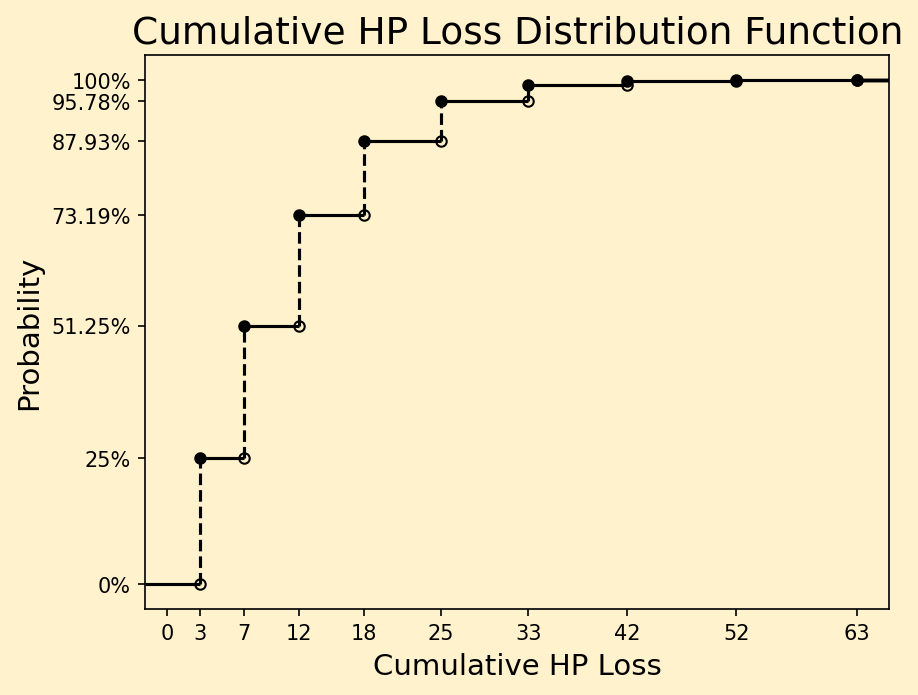

In [193]:
# Plot Cumulative HP Loss Distribution Function
fig, ax = plt.subplots(dpi=150)

# Formatting
plt.title("Cumulative HP Loss Distribution Function", fontsize=18)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("Cumulative HP Loss", fontsize=14)
ax.set_facecolor("#fff2cc")
fig.patch.set_facecolor('#fff2cc')
plt.xlim([-2,66])
plt.ylim([-0.05, 1.05])

y_ticks = np.concatenate(([0], subseq_cum_p_win[0][0:5], [1]))
y_tick_labels = np.array([f"{x*100:.2f}".rstrip("0").rstrip(".")+"%" for x in y_ticks])

plt.xticks(np.concatenate(([0], subseq_cum_HP_loss[0])))
plt.yticks(ticks=y_ticks, labels=y_tick_labels)

# Plotting
for i in range(n):
    # Plot points and horizontal lines
    if i == 0:
        plt.plot([subseq_cum_HP_loss[0][0]], [0], 'k.', fillstyle="none", ms=10)
        plt.plot([subseq_cum_HP_loss[0][0]], [subseq_cum_p_win[0][0]], 'k.', ms=10)
        plt.vlines(x=subseq_cum_HP_loss[0][0], ymin=0, ymax=subseq_cum_p_win[0][0],
               colors='k', linestyles='--')
        plt.hlines(y=0, xmin=-2, xmax=subseq_cum_HP_loss[0][0],
                   colors='k')
    else:
        plt.plot([subseq_cum_HP_loss[0][i]], [subseq_cum_p_win[0][i-1]], 'k.', fillstyle="none", ms=10)
        plt.plot([subseq_cum_HP_loss[0][i]], [subseq_cum_p_win[0][i]], 'k.', ms=10)
        plt.vlines(x=subseq_cum_HP_loss[0][i], ymin=subseq_cum_p_win[0][i-1], ymax=subseq_cum_p_win[0][i],
               colors='k', linestyles='--')
        plt.hlines(y=subseq_cum_p_win[0][i-1], xmin=subseq_cum_HP_loss[0][i-1], xmax=subseq_cum_HP_loss[0][i],
                   colors='k')
    plt.hlines(y=1, xmin=63, xmax=70, colors='k')

    # Axes
    # plt.hlines(y=0, xmin=-10, xmax=70, color='k', linewidth=0.5, linestyle='-')
    # plt.vlines(x=0, ymin=-0.05, ymax=1.05, color='k', linewidth=0.5, linestyle='-')
        
plt.savefig("Cumulative HP Loss Distribution Function")

In [212]:
# If I assign a HP value to a relic, I want to know my expected value in terms of relics at each step
relic_value_in_HP = 12
reward_value_at_step = np.zeros(n)

for i in range(n):
    reward_value_at_step[i] = subseq_cum_p_win[0][i] - subseq_cum_HP_loss[0][i]/relic_value_in_HP

print(reward_value_at_step)
# This seems to be nonsense


[ 0.         -0.07083333 -0.268125   -0.62065625 -1.12556302 -1.76055742
 -2.50158361 -3.33341251 -4.25      ]


-0.07333333333333336